# Project Sentinel-Grid: AI-Driven Anomaly Detection for KRITIS
Focus: Industrial Control System (ICS) Security & Behavioral Analysis

Lead Developer: Sandra Weiß

Date: December 2025

__________________________________________________________________

**Phase 1: Establishing the Operational Baseline**

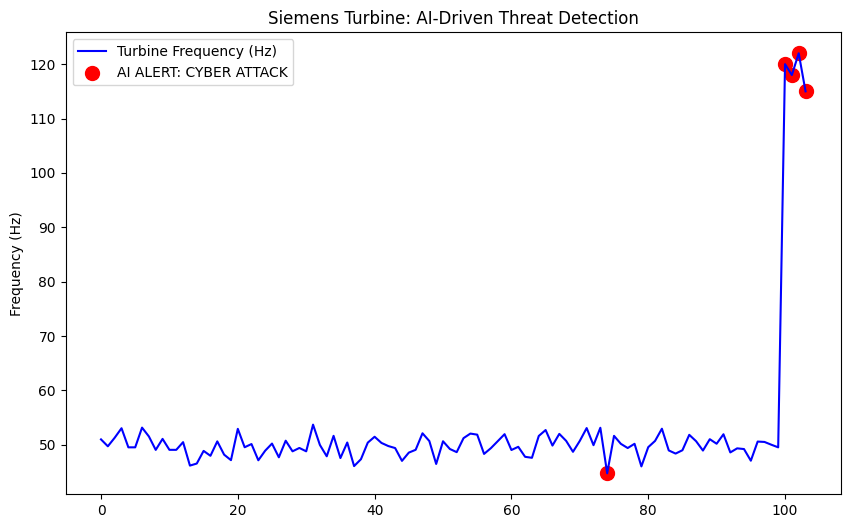

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
# --- STEP 1: CREATE FAKE TURBINE DATA ---
# Normal vibration is around 50Hz with a little bit of 'noise'
np.random.seed(42)
normal_data = np.random.normal(50, 2, 100).reshape(-1, 1)

# Attack: Someone hacks the controller to spin the turbine at 120Hz!
attack_data = np.array([120, 118, 122, 115]).reshape(-1, 1)

# Combine them into one "live stream"
full_stream = np.concatenate([normal_data, attack_data])

# --- STEP 2: SETUP THE AI (Isolation Forest) ---
# 'contamination' is the % of data we think might be an attack
model = IsolationForest(contamination=0.04)
model.fit(full_stream)

# --- STEP 3: PREDICT ---
# 1 = Normal, -1 = Anomaly (The Attack)
predictions = model.predict(full_stream)

# --- STEP 4: VISUALIZE ---
plt.figure(figsize=(10,6))
plt.plot(full_stream, label='Turbine Frequency (Hz)', color='blue')
plt.scatter(np.where(predictions == -1), full_stream[predictions == -1],
            color='red', label='AI ALERT: CYBER ATTACK', s=100)
plt.title("Siemens Turbine: AI-Driven Threat Detection")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()

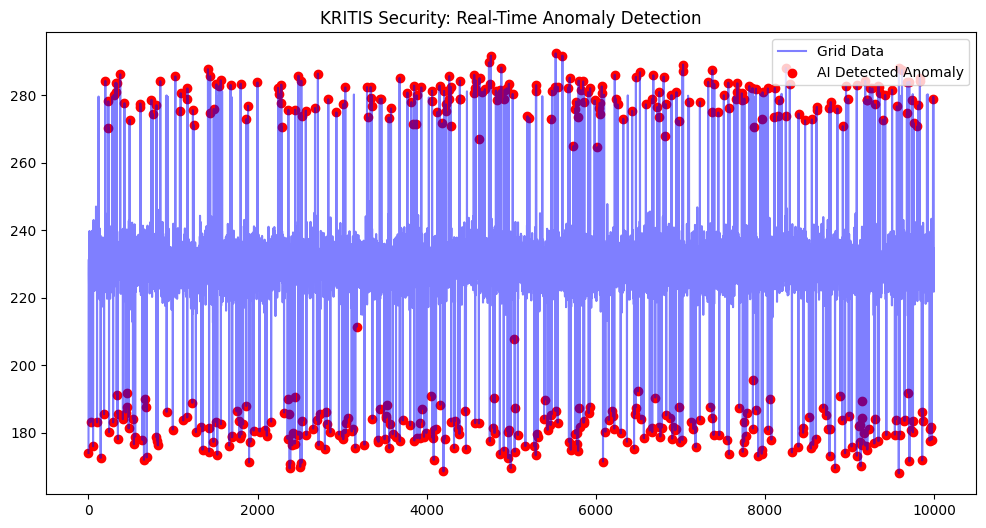

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Load your Kaggle file (Replace 'your_file_name.csv' with the actual name)
df = pd.read_csv('power_system_multiclass_anomaly_data.csv')

# 2. Select a column to analyze
# Look at your df.head() output. If there is a column like 'Voltage' or 'Value', use that.
# We turn it into a list for the AI.
data_to_analyze = df[['Voltage (V)']].values

# 3. Setup the AI
model = IsolationForest(contamination=0.05) # Assume 5% of data might be weird
model.fit(data_to_analyze)

# 4. Predict
df['anomaly_score'] = model.predict(data_to_analyze)

# 5. Visualize the results
plt.figure(figsize=(12,6))
# Plot the normal data in blue
plt.plot(df['Voltage (V)'], color='blue', label='Grid Data', alpha=0.5)

# Highlight the anomalies in red
anomalies = df[df['anomaly_score'] == -1]
plt.scatter(anomalies.index, anomalies['Voltage (V)'], color='red', label='AI Detected Anomaly')

plt.title("KRITIS Security: Real-Time Anomaly Detection")
plt.legend()
plt.show()

# Neuer Abschnitt

**Phase 2: Temporal Correlation & Trend Analysis**

In [5]:
# Create a 'Stricter' AI to reduce false alarms
# We change contamination from 5% (0.05) to 0.5% (0.005)
stricter_model = IsolationForest(contamination=0.005, random_state=42)
stricter_model.fit(data_to_analyze)

# Predict using the new model
df['strict_anomaly'] = stricter_model.predict(data_to_analyze)

# Compare how many alerts we have now
print(f"Original Alerts: {len(df[df['anomaly_score'] == -1])}")
print(f"Stricter Alerts: {len(df[df['strict_anomaly'] == -1])}")

Original Alerts: 500
Stricter Alerts: 48


In [6]:
# 1. Create the rolling mean
df['rolling_mean'] = df['Voltage (V)'].rolling(window=10).mean()

# 2. Use .copy() to avoid the warning and .dropna() to remove the 'empty' first 10 rows
df_clean = df.dropna().copy()

# 3. Define the features (Raw Voltage + the Trend)
features = df_clean[['Voltage (V)', 'rolling_mean']]

# 4. Fit the model
model.fit(features)

# 5. Save the prediction into your clean table
df_clean['smart_anomaly'] = model.predict(features)

print("Smart Anomaly Detection Complete!")

Smart Anomaly Detection Complete!


**Phase 3: Adversarial Stress Testing (Red Teaming)**

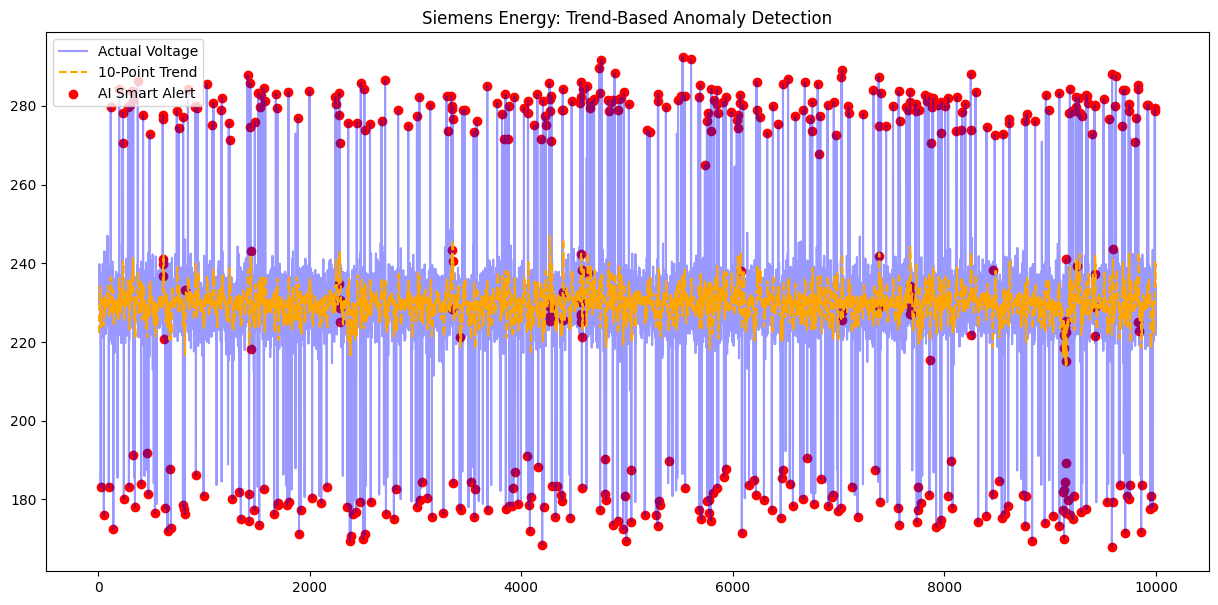

In [7]:
plt.figure(figsize=(15,7))

# Plot the raw voltage
plt.plot(df_clean.index, df_clean['Voltage (V)'], color='blue', label='Actual Voltage', alpha=0.4)

# Plot the rolling trend you created
plt.plot(df_clean.index, df_clean['rolling_mean'], color='orange', label='10-Point Trend', linestyle='--')

# Highlight the SMART anomalies in red
smart_anomalies = df_clean[df_clean['smart_anomaly'] == -1]
plt.scatter(smart_anomalies.index, smart_anomalies['Voltage (V)'], color='red', label='AI Smart Alert')

plt.title("Siemens Energy: Trend-Based Anomaly Detection")
plt.legend()
plt.show()

**Test 1: Replay Attack Simulation**

In [8]:
# --- SIMULATING A REPLAY ATTACK ---
import numpy as np
# 1. Take a 'perfect' segment of normal data (e.g., first 50 rows)
replay_segment = df_clean['Voltage (V)'].iloc[0:50].values
# 2. Inject this 'fake' perfect data into a high-risk area
# You replace a segment of the data with your 'perfect' replay
df_attack = df_clean.copy()
# Let's say the attack starts at row 200
df_attack.iloc[200:250, df_attack.columns.get_loc('Voltage (V)')] = replay_segment

# 3. Add a 'Physical Reality' column (what's REALLY happening)
# In reality, the voltage is spiking to 300V, but the sensor says 230V (from replay)
print("Replay Attack Simulated: The sensor now shows 'perfect' data during a crisis.")

Replay Attack Simulated: The sensor now shows 'perfect' data during a crisis.


**Test 2: Man-in-the-Middle (MITM) Bias Injection**

In [9]:
# --- SIMULATING A MITM DATA INJECTION ---
# The attacker adds a +15V bias to every reading to hide a failing transformer
# 1. First, create the df_mitm dataframe
df_mitm = df_clean.copy()

# 2. Now perform the assignment (using the clean .loc method)
df_mitm.loc[df_mitm.index[300:450], 'Voltage (V)'] += 15

print("MITM Attack Simulated: +15V bias injected into the stream.")

MITM Attack Simulated: +15V bias injected into the stream.


In [10]:
# --- STEP 1: SIMULATING A MITM DATA INJECTION ---
# Create a fresh copy to isolate this specific attack
df_mitm = df_clean.copy()
# Inject a constant +15V bias into a 150-point window (Rows 300 to 450)
# This simulates a hacker subtly 'nudging' the sensor readings
df_mitm.loc[df_mitm.index[300:450], 'Voltage (V)'] += 15

# --- STEP 2: RUN THE DEFENSE ---
# You use the same 'model' you trained earlier to see if it catches the bias
df_mitm['mitm_anomaly'] = model.predict(df_mitm[['Voltage (V)', 'rolling_mean']])
print("MITM Attack Simulation & Detection Complete.")

MITM Attack Simulation & Detection Complete.


**Phase 4: Comparative Detection Results**

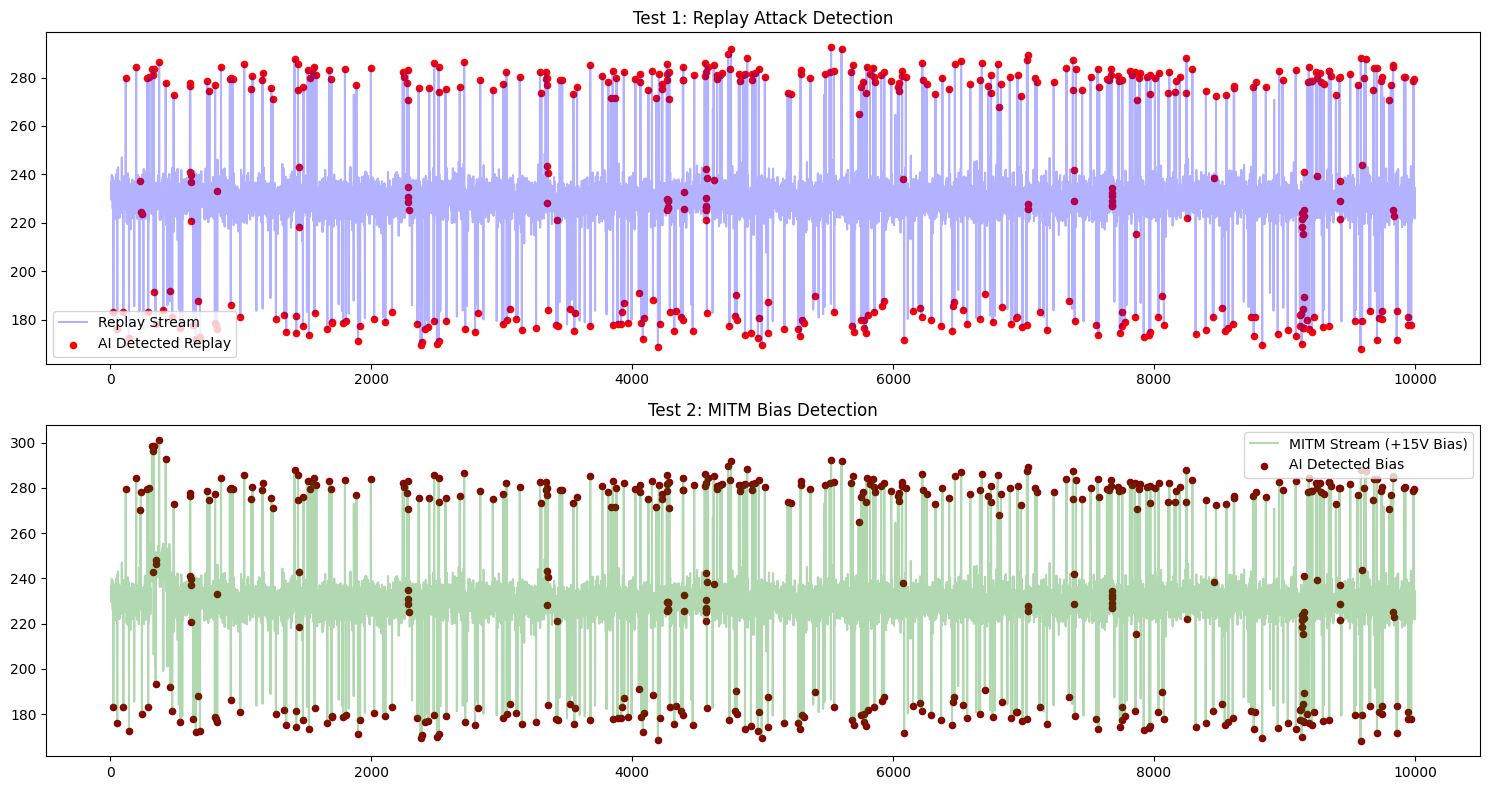

In [11]:
plt.figure(figsize=(15, 8))
# Plot 1: The Replay Attack Results
plt.subplot(2, 1, 1)
plt.plot(df_attack['Voltage (V)'], color='blue', alpha=0.3, label='Replay Stream')
replay_hits = df_attack[df_attack['smart_anomaly'] == -1]
plt.scatter(replay_hits.index, replay_hits['Voltage (V)'], color='red', s=20, label='AI Detected Replay')
plt.title("Test 1: Replay Attack Detection")
plt.legend()
# Plot 2: The MITM Attack Results
plt.subplot(2, 1, 2)
plt.plot(df_mitm['Voltage (V)'], color='green', alpha=0.3, label='MITM Stream (+15V Bias)')
mitm_hits = df_mitm[df_mitm['mitm_anomaly'] == -1]
plt.scatter(mitm_hits.index, mitm_hits['Voltage (V)'], color='darkred', s=20, label='AI Detected Bias')
plt.title("Test 2: MITM Bias Detection")
plt.legend()
plt.tight_layout()
plt.show()